# Εργαστηριακή Άσκηση 4

In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline
rd.seed(3112163)

# Άσκηση 1
1. Στο πρώτο διάγραμμα όπως είναι λογικό, ο τυχαίος περίπατος στους ακεραίους τόσο όταν $P[x,x-1] = \frac{1}{5}$ $P[x,x+1] = \frac{4}{5}$ και όταν $P[x,x-1] = \frac{4}{5}$ $P[x,x+1] = \frac{1}{5}$ να έχει τάση φυγής στο άπειρο. 
2. Επίσης στο ιστόγραμμα των χρόνων φυγής βλέπουμε ότι η μέση τιμή δεν είναι η ίδια και για τις δύο περιπτώσεις, αυτό οφείλεται στο γεγονός ότι δεν είναι συμμετρικά τα όρια διαφυγής από τις δύο πλευρές. Δηλαδή κινούνται στο διάστημα $[-70,100]$ και όχι σε ένα της μορφής $[-\alpha,\alpha],\ \alpha > 0$. 

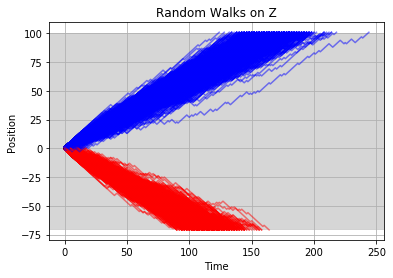

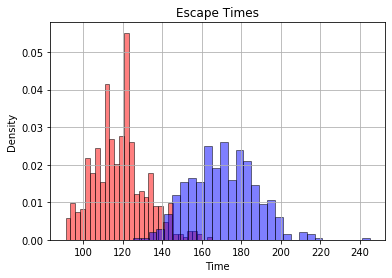

In [2]:
def randomWalkZ (start, probs):
    x = start
    steps = [1, -1]  # probs order should be (left, right)
    while True:  # continue for ever in needed
        x += rd.choice(steps, p=probs)
        yield x  #

upperB = 100
lowerB = -70

fig, ax = plt.subplots()
comTime = []
impTime = []
N = 500
for i in  range(N):
    communist = randomWalkZ(0,(1/5,4/5))
    imperialist = randomWalkZ(0,(4/5,1/5))
    com = []
    imp = []
    iterator = 0
    time = 0
    while (lowerB <= iterator <= upperB):
        time += 1
        iterator = next(communist)
        com.append(iterator)
    comTime.append(time)
    ax.plot(com, color = 'r', alpha = 0.5)
    iterator = 0
    time = 0
    while (lowerB <= iterator <= upperB):
        time += 1
        iterator = next(imperialist)
        imp.append(iterator)
    impTime.append(time)
    ax.plot(imp, color = 'b', alpha = 0.5)
plt.axhspan(lowerB, upperB, color = '#cccccc', alpha = 0.8)
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Random Walks on Z")
plt.grid()
plt.show()

#fig, ax = plt.subplots()
plt.hist(comTime, bins=30,alpha = 0.5, color = 'r', edgecolor='black', density=True)
plt.hist(impTime, bins=30,alpha = 0.5, color = 'b', edgecolor='black', density=True)
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Escape Times')
plt.grid()
plt.show()

# Άσκηση 2
Τόσο τα διαγράμματα όσο και ο υπολογισμός της μέσης τιμής και της διασποράς φαίνονται παρακάτω.


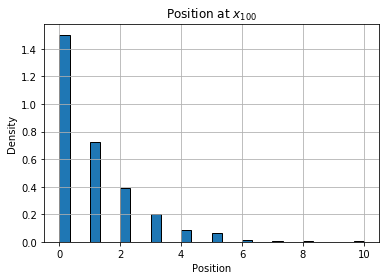

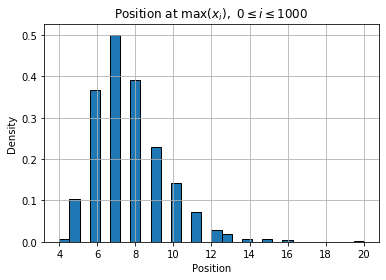

Mean of max(x_i), i <= 1000: 7.732
Variance of max(x_i), i <= 1000: 3.3161760000000005


In [3]:
def randomWalk (start = 0, probs = [1/3,2/3]):
    x = start
    stepsFromZero = [1, 0]
    stepsFromNotZero = [1,-1]
    while True:  
        if (x == start):
            x += rd.choice(stepsFromZero, p=probs)
        else:
            x += rd.choice(stepsFromNotZero, p=probs)
        yield x  #

x100 = []

for i in range(1000):
    jonny = randomWalk()
    j = 0
    x = 0
    while(j<101):
        j+=1
        x = next(jonny)
    x100.append(x)
plt.hist(x100, bins=30, edgecolor='black', density=True)
plt.xlabel('Position')
plt.ylabel('Density')
plt.title('Position at $x_{100}$')
plt.grid()
plt.show()

maxX_1000 = []

for i in range(1000):
    jonny = randomWalk()
    j = 0
    x = 0
    maxX = 0
    while(j<1001):
        j+=1
        x = next(jonny)
        if (x >= maxX): maxX = x
    maxX_1000.append(maxX)



plt.hist(maxX_1000, bins=30, edgecolor='black', density=True)
plt.xlabel('Position')
plt.ylabel('Density')
plt.title('Position at $\max(x_i),\ 0 \leq i \leq 1000$')
plt.grid()
plt.show()

print ("Mean of max(x_i), i <= 1000:", np.mean(maxX_1000) )
print ("Variance of max(x_i), i <= 1000:", np.var(maxX_1000) )

# Άσκηση 3
Στο διάγραμμα λογαριθμικής κλίμακας παρατηρούμε ότι η κλίση της ευθείας είναι περίπου 2. Αυτό σημαίνει ότι η σχέση της ακτίνας με τον χρόνο φυγής από αυτή είναι της μορφής $escape\_time = a(radius)^2 + b,\ a,b \in R$. Αυτό έρχεται σαν συνέπεια του οτι το πλήθος των καταστάσεων που μπορεί να βρεθεί η αλυσίδα είναι μικρότερο ή ίσο του τετραγώνου της ακτίνας που τις περιέχει. 

The Slope of this line is 1.9526255285964653


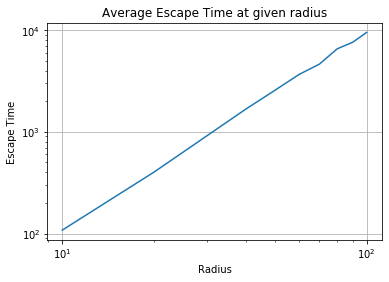

In [4]:
def rand_walk_Z2(start=(0, 0), probs=(0.25, 0.25, 0.25, 0.25)):
    # probs order (left, right, bottom, up)
    x, y = start
    steps = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    while True:
        dx, dy = steps[rd.choice(4, p=probs)]  # choice(4) = choose a number in [0,3]
        x, y = x + dx, y + dy
        yield x, y

r = 20  # radius of circle boundary
escapeTime = []
radius = range(10,110,10)
for r in radius:
    r2 = r**2  # square of radius


    escape_time = []
    for n in range(500):
        walker = rand_walk_Z2()
        x, y = (0, 0)
        t = 0
        while x**2 + y**2 < r2:
            x, y = next(walker)
            t += 1
        escape_time.append(t)
    escapeTime.append(np.mean(escape_time))
line = np.polyfit(np.log10(radius),np.log10(escapeTime),1)
print ("The Slope of this line is", line[0])
plt.subplot()
plt.loglog(radius, escapeTime)

#plt.yscale('log')
plt.xlabel('Radius')
plt.ylabel('Escape Time')
plt.title('Average Escape Time at given radius')
plt.grid()
plt.show()